# Titanic - Machine Learning from Disaster
Data set is origionated from Kaggle
https://www.kaggle.com/c/titanic

Part of the data code refer to Caicai's tutorial about sklearn

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir('/Users/ellenyz/OneDrive - UW-Madison/data/Machine Learning')

In [5]:
data = pd.read_csv('Taitanic data/data.csv')

In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
pd.DataFrame({"Data type":data.dtypes})

,Data type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Check the proportion of missing value
pd.DataFrame({"Missing values (%)":data.isnull().sum()/len(data.index)*100})

,Missing values (%)
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


--------------------------
**From above we can obtain a lot of information about the dataset we are dealing with.**

**Some key facts include:**
* There were total 891 passengers on board, 38.38% of them survived.
* 177 out of 891 passengers' age record are missing. Among the 714 samples, the yougest passenger was less than half-year old while the oldest was 80-year old.
* 687 out of 891 record of Cabin number are missing.
* 2 out of 891 are missing in the Port of Embarkation.
--------------------------

## 1. Data Cleaning

In [11]:
# Remove unrelevant dimensions
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1) 
#axis=1 to delete columns, axis=0 to delete rows

In [12]:
# fill na in 'Age' with mean
data.loc[:,'Age'] = data.loc[:,'Age'].fillna(data.loc[:,'Age'].mean())
# only 2 rows have missing data in 'Embarked' so we can drop them
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [13]:
# Transfer category variables into integer
# For binary variable:
data['Sex'] = (data['Sex']=='male').astype('int')

# For multi-cat variable:
# This method is feasible only if number of categories<10
labels = data['Embarked'].unique().tolist() #return ['S', 'C', 'Q']
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


## 2.0 Split data set and build DecisionTreeClassifier

In [15]:
x = data.iloc[:,data.columns!='Survived']
y = data.iloc[:,data.columns=='Survived']

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [17]:
Xtrain.head()
# The indexing has been messed up, keep it in order

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
561,562,3,1,40.0,0,0,7.8958,0
9,10,2,0,14.0,1,0,30.0708,1
74,75,3,1,32.0,0,0,56.4958,0
477,478,3,1,29.0,1,0,7.0458,0
484,485,1,1,25.0,1,0,91.0792,1


In [18]:
# Reassign the indises
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0]) # i.shape[0] returns the number of rows

In [19]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_ 

0.7490636704119851

In [20]:
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7469611848825333

## 3. Tuning for the Parameters

0.8166624106230849


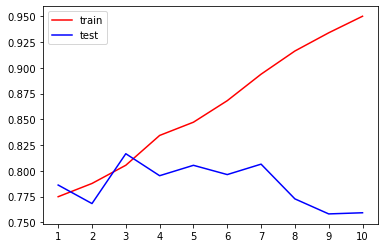

In [21]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                 criterion='entropy'
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain) #train error
    score_te = cross_val_score(clf,x,y,cv=10).mean() #test error
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()
# extremely overfitted when max_depth = 10

### Grid Search Technique

In [22]:
import numpy as np
gini_threshold = np.linspace(0,0.5,20)
#etropy_threshold = np.linspace(0,1,20)

parameters = {'criterion':('gini','entropy')
              ,'splitter':('best','random')
              ,'max_depth':([*range(1,11)])  # [*range(1,11)] return a list
              ,'min_samples_leaf':([*range(1,50,5)])
              ,'min_impurity_decrease':([*np.linspace(0,0.5,50)]) # entropy difference bt upper node and the lower node, hard to define without gridsearch
}

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain, Ytrain)

In [23]:
GS.best_params_  # this will return the best set of parameters

{'criterion': 'gini',
 'max_depth': 8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [24]:
GS.best_score_   # this is the precision rate of the model with best set of parameters

0.821505376344086

## Final Test

In [110]:
test = pd.read_csv('Taitanic data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
test.drop(['Cabin','Name','Ticket'],inplace=True,axis=1) 
test.loc[:,'Age'] = test.loc[:,'Age'].fillna(test.loc[:,'Age'].mean())
test.loc[:,'Fare'] = test.loc[:,'Fare'].fillna(test.loc[:,'Fare'].mean())
test['Sex'] = (test['Sex']=='male').astype('int')
labels = test['Embarked'].unique().tolist() #return ['S', 'C', 'Q']
test['Embarked'] = test['Embarked'].apply(lambda x: labels.index(x))

In [115]:
clf = DecisionTreeClassifier(random_state=25,
                             criterion='gini',
                             max_depth=8,
                             min_impurity_decrease=0,
                             min_samples_leaf=6,
                             splitter='best')
clf = clf.fit(Xtrain, Ytrain)
pred = clf.predict(test)

In [116]:
result = pd.DataFrame(test.iloc[:,0])
result['Survived']=pred.tolist()
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [117]:
result.to_csv('titan_result',index=False)